## Multi Layer Perceptron Tutorial
- MOBIS 2D-3D Correlation Data
0. module import
1. 데이터 load
2. 데이터 전처리 (Normalization)
3. MLP 모델 구성
4. MLP 학습
5. MLP 성능 테스트

### 0. module import

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

In [25]:
folder_path = os.getcwd()

### 1. 데이터 load

In [26]:
from sklearn.model_selection import train_test_split

# load x_train
# col_names1 = ['number', 'speed', 'ia_outer', 'beta_outer', 'ia_inner', 'beta_inner', 'torque', 'Vph_outer', 'Vph_inner', 'Wi']
# col_names2 = ['ia_outer', 'beta_outer', 'ia_inner', 'beta_inner', 'Ld_outer', 'Lq_outer', 'Md_outer', 'Mq_outer', 'psi_outer', 'Ld_inner', 'Lq_inner', 'Md_inner', 'Mq_inner', 'psi_inner']
data = np.loadtxt(r".\HSW_data1.dat")

x = data[:, 1:6]
y = data[:, 6:]

In [39]:
data_min = np.min(data, axis=0)
data_max = np.max(data, axis=0)

print(data_max)
print(data_min)

[1599.         4500.           24.           30.           24.
   30.            5.51068045   37.6050471    38.27189807   20.77616665]
[0.0000000e+00 1.0000000e+00 2.4000000e-01 3.0000000e-01 2.4000000e-01
 3.0000000e-01 5.0064630e-02 5.1107377e-02 4.4559685e-02 7.6500000e-06]


### 2. 데이터 전처리 (Normalization)

In [27]:
# normalization
def normalization(data):
    data_min = np.min(data, axis=0)
    data_max = np.max(data, axis=0)
    data_norm = (data - data_min) / (data_max - data_min)
    return data_norm

data_norm = normalization(data)

print(data_norm.shape)

(1600, 10)


In [28]:
np.savetxt(os.path.join(folder_path, 'data_norm.dat'), data_norm, delimiter='\t')

In [29]:
# data = pd.DataFrame(data, columns=col_names1)
train, test = train_test_split(data_norm, test_size=0.2, shuffle=True)

x_train_norm = train[:, 1:6]
y_train_norm = train[:, 6:]
x_test_norm  = test[:, 1:6]
y_test_norm  = test[:, 6:]

In [30]:
np.savetxt(os.path.join(folder_path, 'x_train_norm.dat'), x_train_norm, delimiter='\t')
np.savetxt(os.path.join(folder_path, 'y_train_norm.dat'), y_train_norm, delimiter='\t')
np.savetxt(os.path.join(folder_path, 'x_test_norm.dat'), x_test_norm, delimiter='\t')
np.savetxt(os.path.join(folder_path, 'y_test_norm.dat'), y_test_norm, delimiter='\t')

In [31]:
print(x_train_norm)

[[0.66659258 0.         0.66329966 0.         0.        ]
 [0.33318515 0.24242424 0.66329966 0.         0.        ]
 [0.33318515 1.         0.66329966 1.         0.32659933]
 ...
 [0.33318515 1.         0.         0.         0.        ]
 [0.66659258 1.         0.32659933 0.49494949 0.        ]
 [0.         0.         0.66329966 0.         0.        ]]


### 3, 4. MLP 모델 구성 및 학습

In [32]:
# define MLP model
# batch_size = 32
num_input = 5

model = Sequential()
model.add(Dense(32, input_shape=(5, ), kernel_initializer="GlorotNormal", activation="relu"))
model.add(Dense(64, kernel_initializer="GlorotNormal", activation="relu"))
model.add(Dense(32, kernel_initializer="GlorotNormal", activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer="GlorotNormal", activation="relu"))
model.compile(loss="mse", optimizer=Adam(lr=0.001), metrics="mse")
model.summary()

# fit model
history = model.fit(x_train_norm, y_train_norm[:, 3], epochs=10, batch_size=32)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
40/40 [==============================] - 0s 409us/step - loss: 0.1432 - mse: 0.1432
Epoch 2/10
40/40 [=====

In [33]:
print(x_train_norm.shape)
print(y_train_norm.shape)

(1280, 5)
(1280, 4)


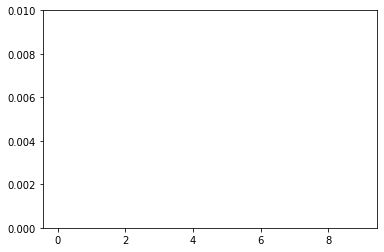

In [34]:
plt.plot(history.history["loss"])
plt.ylim(0, 0.01)
plt.show()

### 5. MLP 성능 테스트

In [35]:
# test
y_predict = model.predict(x_test_norm)

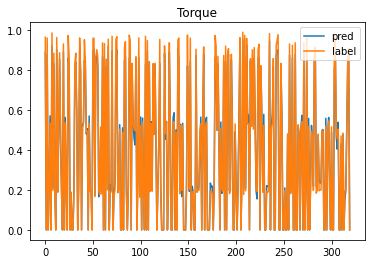

0.04010987284095511

In [36]:
plt.plot(y_predict[:, 0], label="pred")
plt.plot(y_test_norm[:, 3], label="label")
plt.title("Torque")
plt.legend()
plt.show()

def NRMSE(pred, label):
    return np.sqrt(np.mean((pred - label) ** 2))

NRMSE(y_predict[:, 0], y_test_norm[:, 3])

In [37]:
# test
y_predict = model.predict(x_train_norm)

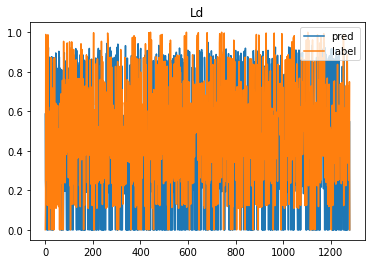

IndexError: index 1 is out of bounds for axis 1 with size 1

In [38]:
plt.plot(y_predict[:, 0], label="pred")
plt.plot(y_train_norm[:, 0], label="label")
plt.title("Ld")
plt.legend()
plt.show()

plt.plot(y_predict[:, 1], label="pred")
plt.plot(y_train_norm[:, 1], label="label")
plt.title("Lq")
plt.legend()
plt.show()

plt.plot(y_predict[:, 2], label="pred")
plt.plot(y_train_norm[:, 2], label="label")
plt.title("psi_a")
plt.legend()
plt.show()

In [45]:
print(data_max)

[1599.         4500.           24.           30.           24.
   30.            5.51068045   37.6050471    38.27189807   20.77616665]


In [42]:
print(x_train_norm)

[[0.66659258 0.         0.66329966 0.         0.        ]
 [0.33318515 0.24242424 0.66329966 0.         0.        ]
 [0.33318515 1.         0.66329966 1.         0.32659933]
 ...
 [0.33318515 1.         0.         0.         0.        ]
 [0.66659258 1.         0.32659933 0.49494949 0.        ]
 [0.         0.         0.66329966 0.         0.        ]]


In [46]:
print(np.max(data[:,1:6], axis=0))

[4500.   24.   30.   24.   30.]


In [47]:
# denormalization
def denormalization_x(data_norm):
    a = data_norm * (np.max(data[:,1:6], axis=0)-np.min(data[:,1:6], axis=0)) + np.min(data[:,1:6], axis=0)
    return a

def denormalization_y(data_norm):
    b = data_norm * (np.max(data[:,6:], axis=0)-np.min(data[:,6:], axis=0)) + np.min(data[:,6:], axis=0)
    return b

x_train = denormalization_x(x_train_norm)
y_train = denormalization_y(y_train_norm)
x_test = denormalization_x(x_test_norm)
y_test = denormalization_y(y_test_norm)


In [48]:
np.savetxt(os.path.join(folder_path, 'x_train.dat'), x_train, delimiter='\t')
np.savetxt(os.path.join(folder_path, 'y_train.dat'), y_train, delimiter='\t')
np.savetxt(os.path.join(folder_path, 'x_test.dat'), x_test, delimiter='\t')
np.savetxt(os.path.join(folder_path, 'y_test.dat'), y_test, delimiter='\t')